## Processing Sensor Data from Catalina Jemez CZO BGZOB Pit 3
Marc Berghouse 9/19/2020

This array includes:
- apogee_SO110
- Vaisala_GMM220
- DecagonMPS6
- Decagon5TE
- Vertical redox prodes from Paleo Terra

Issues:
- Unsure about O2 mask
- I'm not sure which water potential values are unrealistic

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
infile1 = "../../raw_data/Catalina-Jemez/BGZOB_Pit3/BGZOB3_co2o2_2014.csv"
infile2 = "../../raw_data/Catalina-Jemez/BGZOB_Pit3/BGZOB3_co2o2_2015.csv" 
infile3 = "../../raw_data/Catalina-Jemez/BGZOB_Pit3/BGZOB3_co2o2_2016.csv" 
infile4 = "../../raw_data/Catalina-Jemez/BGZOB_Pit3/BGZOB3_co2o2_2017.csv" 
infile5 = "../../raw_data/Catalina-Jemez/BGZOB_Pit3/BGZOB3_soilMTP_2014.csv" 
infile6 = "../../raw_data/Catalina-Jemez/BGZOB_Pit3/BGZOB3_soilMTP_2015.csv" 
infile7 = "../../raw_data/Catalina-Jemez/BGZOB_Pit3/BGZOB3_soilMTP_2016.csv" 
infile8 = "../../raw_data/Catalina-Jemez/BGZOB_Pit3/BGZOB3_soilMTP_2017.csv" 
infile9 = "../../raw_data/Catalina-Jemez/BGZOB_Pit3/BigelowRedox_2015.csv" 
infile10 = "../../raw_data/Catalina-Jemez/BGZOB_Pit3/BigelowRedox_2016.csv" 
infile11 = "../../raw_data/Catalina-Jemez/BGZOB_Pit3/BigelowRedox_2017.csv" 
infile12 = "../../raw_data/Catalina-Jemez/Catalina-Jemez_BGZOB_PRISM.csv"

df1 = pd.read_csv(infile1, na_values='NAN',  parse_dates=[0], index_col=0) 
df2 = pd.read_csv(infile2, na_values='NAN',  parse_dates=[0], index_col=0) 
df3 = pd.read_csv(infile3, na_values='NAN',  parse_dates=[0], index_col=0) 
df4 = pd.read_csv(infile4, na_values='NAN',  parse_dates=[0], index_col=0) 
df5 = pd.read_csv(infile5, na_values='NAN',  parse_dates=[0], index_col=0) 
df6 = pd.read_csv(infile6, na_values='NAN',  parse_dates=[0], index_col=0) 
df7 = pd.read_csv(infile7, na_values='NAN',  parse_dates=[0], index_col=0) 
df8 = pd.read_csv(infile8, na_values='NAN',  parse_dates=[0], index_col=0) 
df9 = pd.read_csv(infile9, na_values='NAN',  parse_dates=[0], index_col=0, usecols = ['DateTime','Pit3_ORP_5','Pit3_ORP_10','Pit3_ORP_30','Pit3_ORP_60']) 
df10 = pd.read_csv(infile10, na_values='NAN',  parse_dates=[0], index_col=0, usecols = ['DateTime','Pit3_ORP_5','Pit3_ORP_10','Pit3_ORP_30','Pit3_ORP_60']) 
df11 = pd.read_csv(infile11, na_values='NAN',  parse_dates=[0], index_col=0, usecols = ['DateTime','Pit3_ORP_5','Pit3_ORP_10','Pit3_ORP_30','Pit3_ORP_60']) 
df12 = pd.read_csv(infile12, na_values=['NAN',-9999,-99999], skiprows=10, parse_dates=[0], index_col=0) 



C:\Users\marcb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\marcb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df1=df1.drop(['MST'])
df2=df2.drop(['MST'])
df3=df3.drop(['MST'])
df4=df4.drop(['MST'])
df5=df5.drop(['MST'])
df6=df6.drop(['MST'])
df7=df7.drop(['MST'])
df8=df8.drop(['MST'])
df9=df9.drop(['MST'])
df10=df10.drop(['MST'])
df11=df11.drop(['MST'])

df4

,TempSO1(10cm),TempSO2(30cm),TempSO3(60cm),TempSO4(115cm),O2soil1(10cm),O2soil2(30cm),O2soil3(60cm),O2soil4(115cm),CO2soil1(10cm),CO2soil2(30cm),CO2soil3(60cm),CO2soil4(115cm)
TIMESTAMP,,,,,,,,,,,,
1/1/2017 0:00,2.777,3.911,4.664,6.103,18.434,18.336,20.036,19.316,2168.147,4313.146,3687.764,708.134
1/1/2017 0:15,2.772,3.895,4.664,6.103,18.417,18.344,20.056,19.353,2208.521,4294.281,3603.007,721.622
1/1/2017 0:30,2.762,3.894,4.664,6.102,18.417,18.324,20.088,19.393,2291.456,4276.874,3385.919,705.582
1/1/2017 0:45,2.755,3.885,4.663,6.102,18.418,18.304,20.092,19.393,2311.415,4260.469,3344.36,701.025
1/1/2017 1:00,2.755,3.873,4.655,6.102,18.418,18.303,20.11,19.393,2337.935,4239.234,3276.555,705.764
...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/2017 22:45,6.918,7.156,7.315,8.601,18.457,19.993,20.325,17.771,1402.550,3465.300,7313.841,13109.650
12/31/2017 23:00,6.888,7.147,7.315,8.601,18.466,19.993,20.326,17.771,1400.910,3457.467,7302.548,13126.410
12/31/2017 23:15,6.867,7.140,7.315,8.601,18.471,19.995,20.326,17.772,1399.726,3468.305,7320.034,13111.650


In [3]:
#df9=df9.loc[0:4]
df10

,Pit3_ORP_5,Pit3_ORP_10,Pit3_ORP_30,Pit3_ORP_60
DateTime,,,,
1/1/2016 0:00,438.1,545.6,610.5,517.6
1/1/2016 0:15,437.5,545.6,610.9,517.6
1/1/2016 0:30,437.5,545.6,610.5,517.6
1/1/2016 0:45,437.5,545.3,611.2,517.6
1/1/2016 1:00,437.5,545.6,610.9,517.9
...,...,...,...,...
12/31/2016 22:45,477.6,504.3,641.5,524.9
12/31/2016 23:00,477.3,505.7,642.2,525.3
12/31/2016 23:15,477.6,506.7,641.9,525.6


In [4]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], sort=False)
df.columns=['ApogeeTemp_10cm.deg.C', 'ApogeeTemp_30cm.deg.C', 'ApogeeTemp_60cm.deg.C', 'ApogeeTemp_115cm.deg.C', 'O2_10cm.percent.0-100','O2_30cm.percent.0-100', 'O2_60cm.percent.0-100', 'O2_115cm.percent.0-100', 'CO2_10cm.ppm', 'CO2_30cm.ppm', 'CO2_60cm.ppm', 'CO2_115cm.ppm', 'WaterPotential_10cm.kPa','WaterPotential_30cm.kPa', 'DecagonMPS6Temp_10cm.deg.C','DecagonMPS6Temp_30cm.deg.C', 'SoilMoisture_10cm.m3m3', 'SoilMoisture_30cm.m3m3', 'SoilMoisture_60cm.m3m3', 'SoilMoisture_115cm.m3m3', 'BulkEC_10cm.dS/m', 'BulkEC_30cm.dS/m', 'BulkEC_60cm.dS/m', 'BulkEC_115cm.dS/m', 'Decagon5TETemp_10cm.deg.C','Decagon5TETemp_30cm.deg.C', 'Decagon5TETemp_60cm.deg.C', 'Decagon5TETemp_115cm.deg.C','ReductionPotential_5cm.mV', 'ReductionPotential_10cm.mV', 'ReductionPotential_30cm.mV', 'ReductionPotential_60cm.mV', 'PRISM_precip.mm' ]

df

,ApogeeTemp_10cm.deg.C,ApogeeTemp_30cm.deg.C,ApogeeTemp_60cm.deg.C,ApogeeTemp_115cm.deg.C,O2_10cm.percent.0-100,O2_30cm.percent.0-100,O2_60cm.percent.0-100,O2_115cm.percent.0-100,CO2_10cm.ppm,CO2_30cm.ppm,...,BulkEC_115cm.dS/m,Decagon5TETemp_10cm.deg.C,Decagon5TETemp_30cm.deg.C,Decagon5TETemp_60cm.deg.C,Decagon5TETemp_115cm.deg.C,ReductionPotential_5cm.mV,ReductionPotential_10cm.mV,ReductionPotential_30cm.mV,ReductionPotential_60cm.mV,PRISM_precip.mm
11/20/2014 16:00,6.981,7.017,6.919,6.296,20.882,20.713,49.273,14.6,1364.299,3022.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 16:15,7.359,7.199,7.339,6.078,20.693,20.696,39.804,21.447,1348.907,3031.603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 16:30,7.426,7.254,7.472,5.918,20.681,20.68,31.474,21.487,1352.266,3051.161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 16:45,7.381,7.278,7.517,5.834,20.674,20.667,26.009,21.497,1358.556,3072.392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 17:00,7.314,7.296,7.54,5.595,20.667,20.659,23.08,21.484,1363.479,3092.167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
#Corrections to whole DataFrame

df=df.astype(float)
df['WaterPotential_10cm.kPa']=abs(df['WaterPotential_10cm.kPa'])
df['WaterPotential_30cm.kPa']=abs(df['WaterPotential_30cm.kPa'])
df.mask(df<=-0.01, inplace=True)


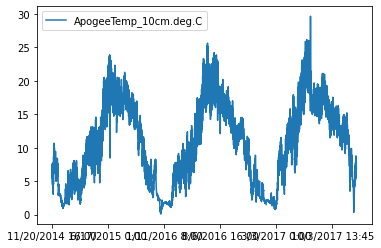

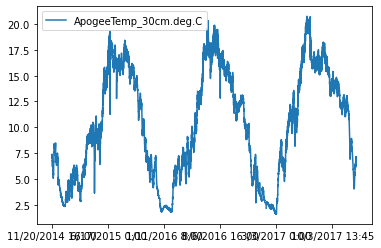

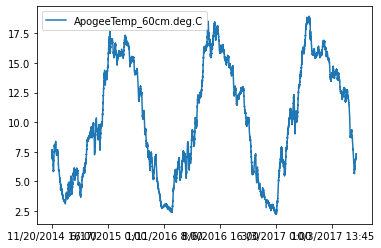

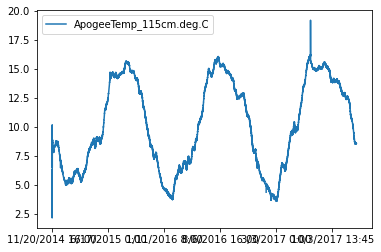

In [6]:
plt.show()
df.plot(use_index=True, y='ApogeeTemp_10cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_30cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_60cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_115cm.deg.C')

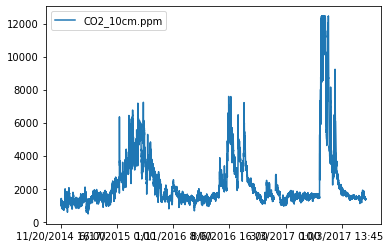

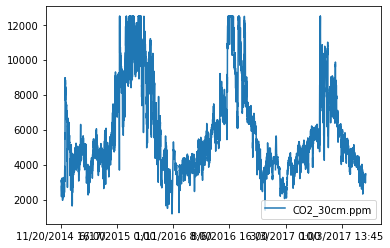

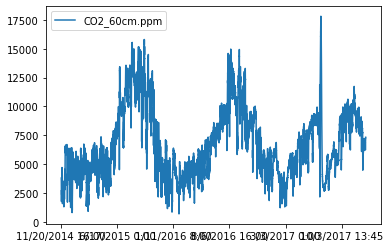

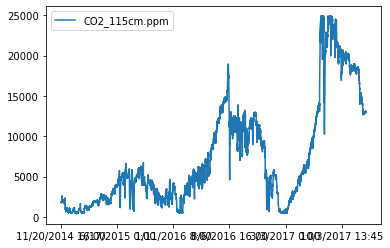

In [7]:
#Plot CO2 data


plt.show()
df.plot(use_index=True, y='CO2_10cm.ppm')
df.plot(use_index=True, y='CO2_30cm.ppm')
df.plot(use_index=True, y='CO2_60cm.ppm')
df.plot(use_index=True, y='CO2_115cm.ppm')




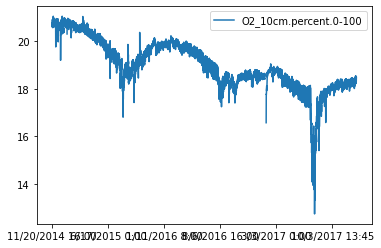

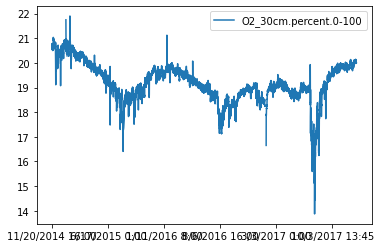

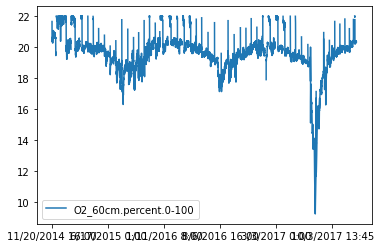

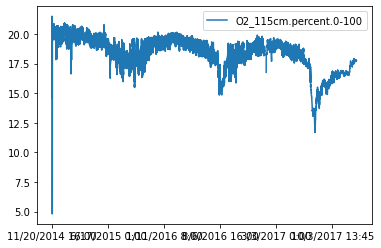

In [8]:
df['O2_30cm.percent.0-100'].mask(df['O2_30cm.percent.0-100']>=22, inplace=True)
df['O2_60cm.percent.0-100'].mask(df['O2_60cm.percent.0-100']>=22, inplace=True)

plt.show()
df.plot(use_index=True, y='O2_10cm.percent.0-100')
df.plot(use_index=True, y='O2_30cm.percent.0-100')
df.plot(use_index=True, y='O2_60cm.percent.0-100')
df.plot(use_index=True, y='O2_115cm.percent.0-100')

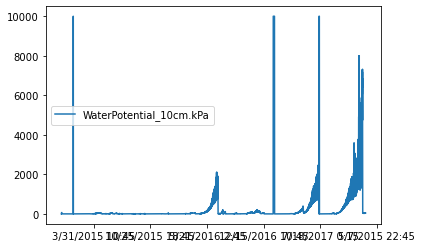

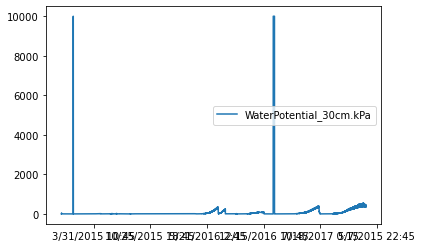

In [9]:
plt.show()
df.plot(use_index=True, y='WaterPotential_10cm.kPa')
df.plot(use_index=True, y='WaterPotential_30cm.kPa')


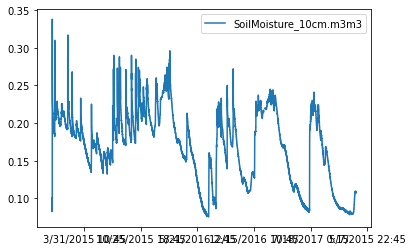

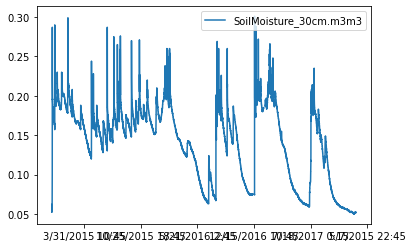

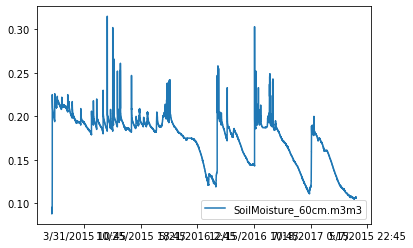

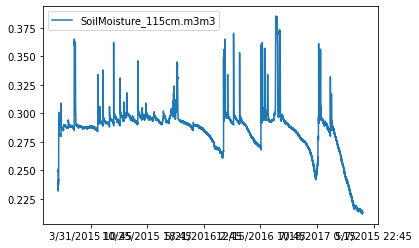

In [10]:
plt.show()
df.plot(use_index=True, y='SoilMoisture_10cm.m3m3')
df.plot(use_index=True, y='SoilMoisture_30cm.m3m3')
df.plot(use_index=True, y='SoilMoisture_60cm.m3m3')
df.plot(use_index=True, y='SoilMoisture_115cm.m3m3')

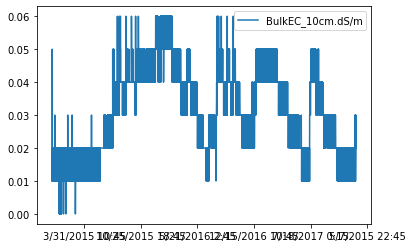

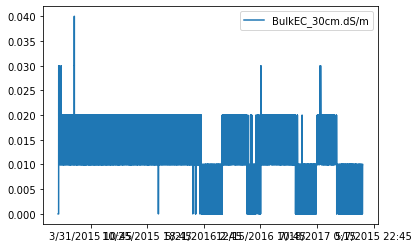

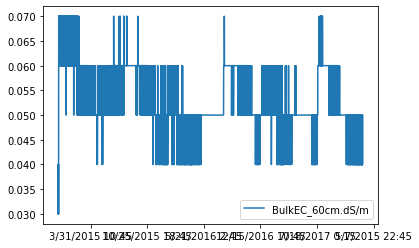

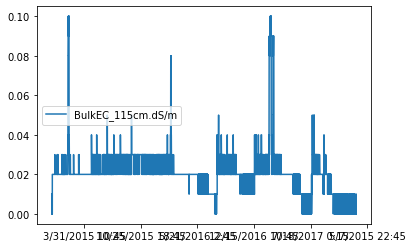

In [11]:
plt.show()
df.plot(use_index=True, y='BulkEC_10cm.dS/m')
df.plot(use_index=True, y='BulkEC_30cm.dS/m')
df.plot(use_index=True, y='BulkEC_60cm.dS/m')
df.plot(use_index=True, y='BulkEC_115cm.dS/m')

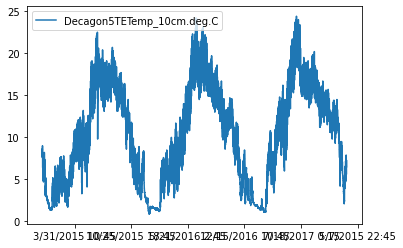

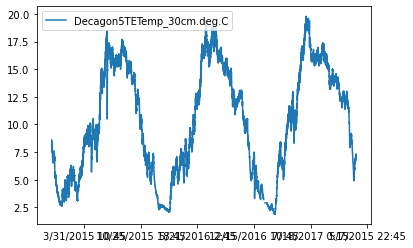

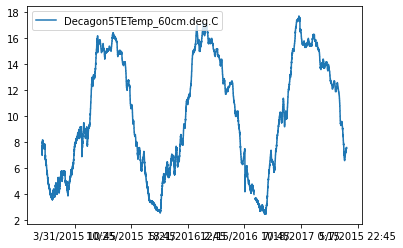

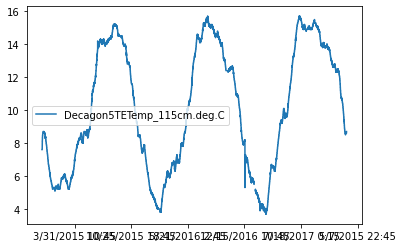

In [12]:
plt.show()
df.plot(use_index=True, y='Decagon5TETemp_10cm.deg.C')
df.plot(use_index=True, y='Decagon5TETemp_30cm.deg.C')
df.plot(use_index=True, y='Decagon5TETemp_60cm.deg.C')
df.plot(use_index=True, y='Decagon5TETemp_115cm.deg.C')



In [13]:
df=df.drop(columns='Decagon5TETemp_10cm.deg.C')
df=df.drop(columns='Decagon5TETemp_30cm.deg.C')
df=df.drop(columns='Decagon5TETemp_60cm.deg.C')
df=df.drop(columns='Decagon5TETemp_115cm.deg.C')


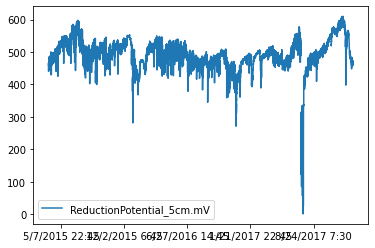

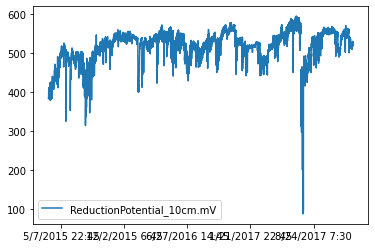

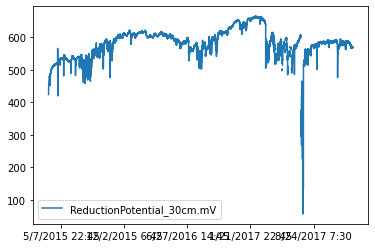

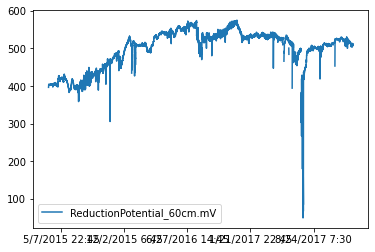

In [14]:
plt.show()
df.plot(use_index=True, y='ReductionPotential_5cm.mV')
df.plot(use_index=True, y='ReductionPotential_10cm.mV')
df.plot(use_index=True, y='ReductionPotential_30cm.mV')
df.plot(use_index=True, y='ReductionPotential_60cm.mV')

In [15]:
output=df.copy()
today = dt.date.today()
outfile = '../../processed_data/Catalina-Jemez/BGZOB_Pit3_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.MST')

In [16]:
output

,ApogeeTemp_10cm.deg.C,ApogeeTemp_30cm.deg.C,ApogeeTemp_60cm.deg.C,ApogeeTemp_115cm.deg.C,O2_10cm.percent.0-100,O2_30cm.percent.0-100,O2_60cm.percent.0-100,O2_115cm.percent.0-100,CO2_10cm.ppm,CO2_30cm.ppm,...,SoilMoisture_115cm.m3m3,BulkEC_10cm.dS/m,BulkEC_30cm.dS/m,BulkEC_60cm.dS/m,BulkEC_115cm.dS/m,ReductionPotential_5cm.mV,ReductionPotential_10cm.mV,ReductionPotential_30cm.mV,ReductionPotential_60cm.mV,PRISM_precip.mm
11/20/2014 16:00,6.981,7.017,6.919,6.296,20.882,20.713,NaN,14.600,1364.299,3022.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 16:15,7.359,7.199,7.339,6.078,20.693,20.696,NaN,21.447,1348.907,3031.603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 16:30,7.426,7.254,7.472,5.918,20.681,20.680,NaN,21.487,1352.266,3051.161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 16:45,7.381,7.278,7.517,5.834,20.674,20.667,NaN,21.497,1358.556,3072.392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/20/2014 17:00,7.314,7.296,7.540,5.595,20.667,20.659,NaN,21.484,1363.479,3092.167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
